<center><b>Exercise</center>

Use famous iris flower dataset from sklearn.datasets to predict flower species using random forest classifier.

Measure prediction score using default n_estimators (10)
Now fine tune your model by changing number of trees in your classifer and tell me what best score you can get using how many trees

In [1]:
import pandas as pd
import seaborn as sn
from sklearn.datasets import load_iris
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
X = df.drop(['target'],axis='columns')
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y= df.target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.5)

In [9]:
len(X_train)

75

In [10]:
len(X_test)

75

In [11]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
model.score(X_test,y_test)

0.92

In [13]:
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [14]:
model.score(X_test,y_test)

0.92

In [15]:
model = RandomForestClassifier(n_estimators=30)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=30)

In [16]:
model.score(X_test,y_test)

0.9066666666666666

<b> Confusion Matrix

In [17]:
y_predicted = model.predict(X_test)

In [18]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[28,  0,  0],
       [ 0, 17,  5],
       [ 0,  2, 23]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

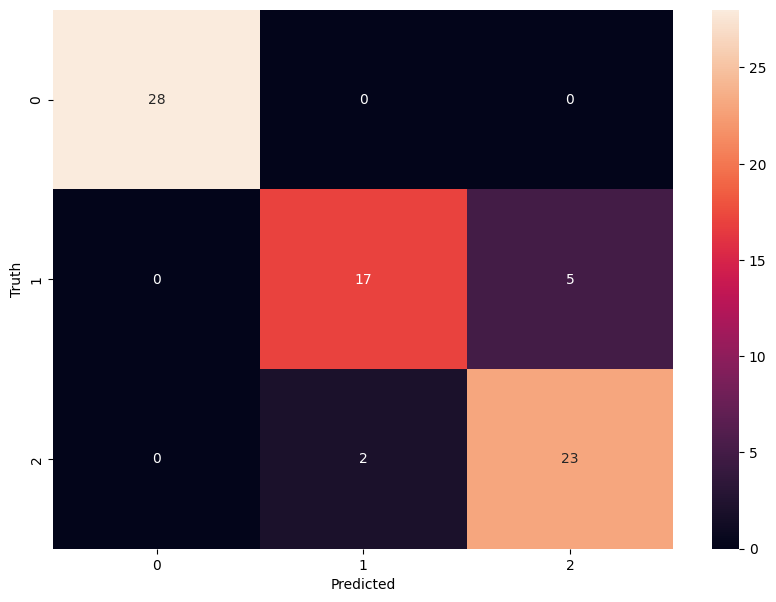

In [19]:
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')